(40.0, 100.0)

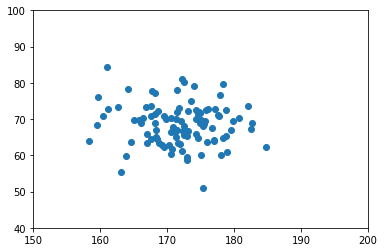

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def component_vector(arr, pca_model):
    x = np.array([-5, 5])
    g = np.sum(arr, axis=0)/arr.shape[0]
    grad = pca_model.components_[0][1]/pca_model.components_[0][0]
    intercept = g[1] - grad*g[0]
    y = grad*x+intercept
    return np.array([x, y])

mean_height = 173
mean_weight = 68
x = np.random.normal(loc=173.0, scale=5.0, size=(1,100))
y = np.random.normal(loc=68.0, scale=6.0, size=(1,100))
data = np.array([x[0],y[0]]).transpose()
sscaler = StandardScaler()
sscaler.fit(data)
data_scaled = sscaler.transform(data)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim(150, 200)
ax.set_ylim(40, 100)

[[-0.70710678  0.70710678]]
[0.54103613 0.45896387]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


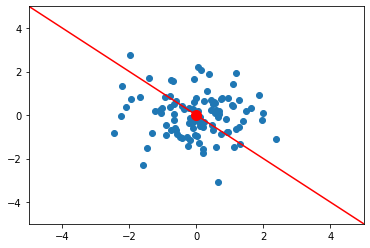

In [4]:
data = np.array([x[0],y[0]]).transpose()
sscaler = StandardScaler()
sscaler.fit(data)
data_scaled = sscaler.transform(data)

pca = PCA(n_components=1)
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)
print(pca.components_)

e, V = np.linalg.eig((data_scaled.T @ data_scaled)/data.shape[0])
print(e/np.sum(e))
print(V)

m = component_vector(data_scaled, pca)
g = np.sum(data_scaled, axis=0)/data_scaled.shape[0]
fig, ax = plt.subplots()
ax.scatter(data_scaled[:,0], data_scaled[:,1])
ax.scatter(g[0],g[1], c='r',s=100)
ax.plot(m[:,0], m[:,1], c="r")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.show()